# ИТОГОВЫЙ ПРОЕКТ

ПРЕПРОЦЕССИНГ ДАННЫХ

ДАНИЛЬЧЕНКО ВАДИМ

---------------------------------------------------------------------------
Проектная работа по модулю “Препроцессинг данных”

1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет
---------------------------------------------------------------------------

Attribute Information:

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry 
* fractal dimension ("coastline approximation" - 1)

---------------------------------------------------------------------------
РЕШЕНИЕ
---------------------------------------------------------------------------

1. загрузка данных

In [1]:
import pandas as pd
df=pd.read_csv('data_breast.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

у нас 32 столбца и 569 наблюдениями (нет пропусков), также один пустой столбец,
от которого мы на следующем шаге избавимся.

In [2]:
df.drop(columns=['Unnamed: 32'], inplace=True)

целевая переменная находится в столбце "diagnosis", посмотрим на количество значений

In [3]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

злокачественное образование отмечается флагом "M"  
так как наша конечная цель обучить алгоритм определять злокачественные образования, приведем его в бинарный вид, где 1 - положительный результат и 0 - отрицательный

In [4]:
df['target']=df.diagnosis.map({'M': 1, 'B': 0})

# удалим исходный столбец
df.drop(columns=['diagnosis'], inplace=True)

# проверим результат
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

2. основные статистики

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


сравним среднее двух выборок с разными диагнозами

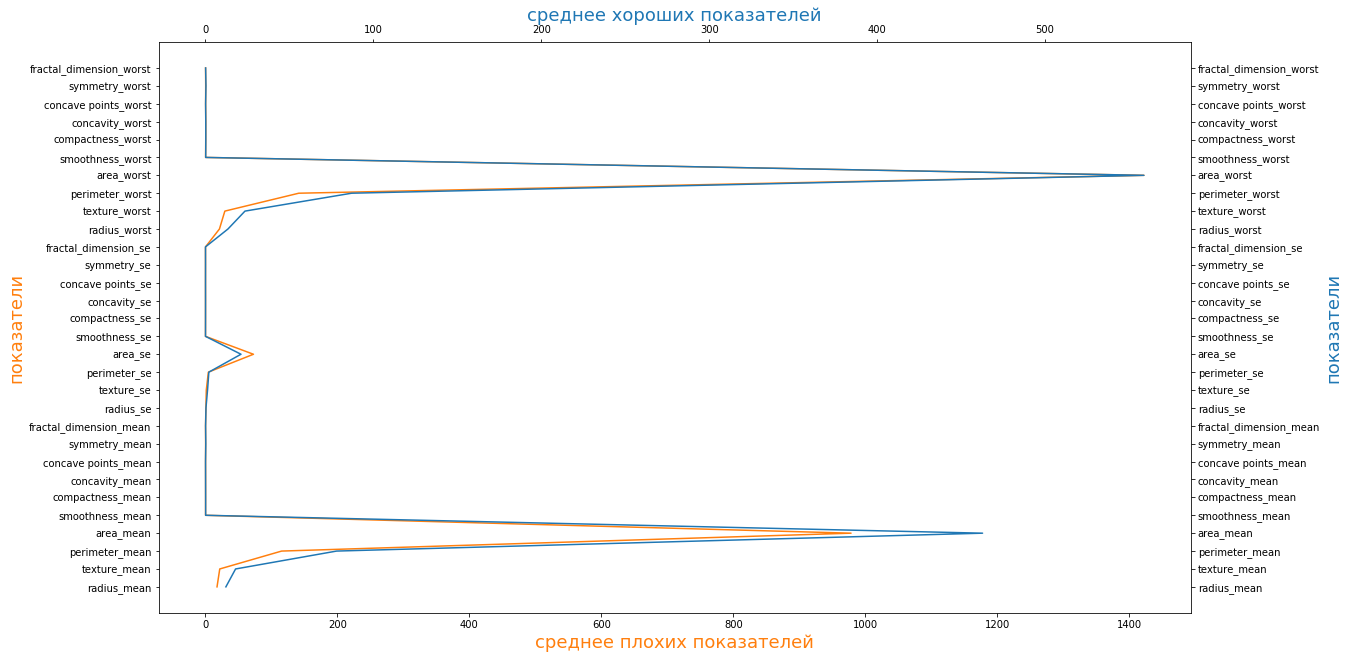

In [18]:
# создадим датафрейм из средних по двум выборкам
df_bad=df[df.target==1].describe().iloc[1,:].reset_index().set_index('index').rename(columns={'mean':'bad_mean'})
df_good=df[df.target==0].describe().iloc[1,:].reset_index().set_index('index').rename(columns={'mean':'good_mean'})
df_to_plot=df_bad.merge(df_good, on='index', how='left')

# исключим столбцы "id" и "target"
df_to_plot=df_to_plot.iloc[1:31,:]

# визуализируем
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.set_xlabel('среднее плохих показателей', color="C1", fontsize=18) 
ax.set_ylabel('показатели', color="C1", fontsize=18)       
ax.xaxis.set_label_position('bottom') 
ax.yaxis.set_label_position('left') 

ax.plot( df_to_plot.bad_mean, df_to_plot.index, color="C1")

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('среднее хороших показателей', color="C0", fontsize=18) 
ax2.set_ylabel('показатели', color="C0", fontsize=18)       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 

ax2.plot(df_to_plot.good_mean, df_to_plot.index, color="C0")

хоть и поведение рядов графика похоже, но можно наблюдать различие в среднем значении выборок:
показатели негативного диагноза в 2-3 раза выше

3. пропущенные значения

In [7]:
df[df.isna()==True].count()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

пропущенных значений нет

4 - 6. матрица корреляции и взаимосвязи между перемеными

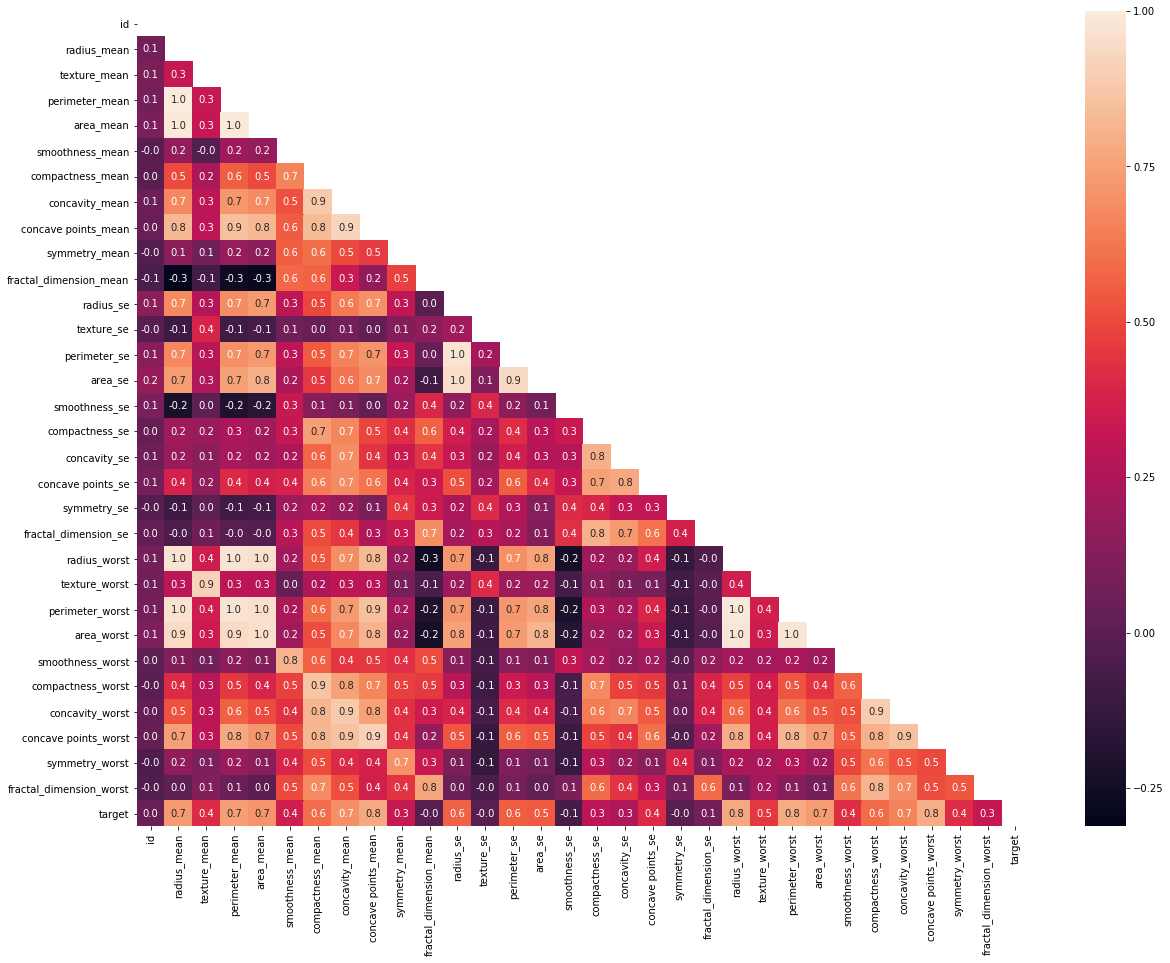

In [8]:
import seaborn as sns
import numpy as np
fig, ax=plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones((len(df.columns), len(df.columns))), k=0)

sns.heatmap(df.corr(), annot=True, mask = mask,
            xticklabels=df.columns.values,
            yticklabels=df.columns.values,
            fmt=".1f",
           )

Наблюдения:
+ perimeter_mean сильно коррелирует с radius_mean и area_mean 
+ также из perimeter_worst, radius_worst и area_worst
+ для perimeter_se, radius_se и area_see картина похожая
+ есть и другие признаки с высокой корреляцией

чтобы избежать мультиколлинеарности следует избавиться по одному признаку из пары с высокой корреляцией. Думаю, будет удобнее выбрать, если вывести только такие признаки (поставим 0,97 пороговым значением отбора)

In [9]:
corr=df.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr=corr_triu[corr_triu > 0.97]
corr

radius_mean      perimeter_mean     0.997855
                 area_mean          0.987357
perimeter_mean   area_mean          0.986507
                 perimeter_worst    0.970387
radius_se        perimeter_se       0.972794
radius_worst     perimeter_worst    0.993708
                 area_worst         0.984015
perimeter_worst  area_worst         0.977578
dtype: float64

теперь видим какие признаки сильно коррелируют друг с другом, удалим их и проверим результат

In [10]:
corr=corr.reset_index()
df_train=df.drop(columns=list(corr[corr.columns[1]].unique()))
corr=df_train.corr()
corr_triu=corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr=corr_triu[corr_triu > 0.97].reset_index()
print('количество сильно коррелирующих признаков: {}'.format(len(corr.index)))

количество сильно коррелирующих признаков: 0


Поверим гипотезы:

$H_0$: между $x_i$ и $y$ нет зависимости

$H_a$: между $x_i$ и $y$ есть зависимость

Если $p$-value достаточно маленький (обычно меньше $5\%$), то мы можем отклонить нулевую гипотезу. 

In [11]:
# используем модель линейной регрессии из statsmodels для получения оценок коэффициентов и p-value
import statsmodels.api as sm
est = sm.OLS(df_train['target'], df_train.drop(columns=['target','id'])).fit()
est_res = est.summary()
test=est_res.tables[1].as_html()
test=pd.read_html(test, header=0, index_col=0)[0]

# сохраним хорошие предикторы (пригодится на следующем шаге)
good_predictors=test[test["P>|t|"]<=0.05].index

print('мы видим, что из {} предикторов (за исключением id) осталось значимых {}:'\
      .format(len(df_train.columns)-2,len(test[test["P>|t|"]<=0.05])))
print('для остальных {} предикторов мы приняли нулевую гипотезу об отсутствии зависимости c целевой переменной'\
      .format(len(df_train.columns)-2-len(test[test["P>|t|"]<=0.05])))
test[test['P>|t|']<=0.05]

мы видим, что из 25 предикторов (за исключением id) осталось значимых 6:
для остальных 19 предикторов мы приняли нулевую гипотезу об отсутствии зависимости c целевой переменной


,coef,std err,t,P>|t|,[0.025,0.975]
fractal_dimension_mean,-21.9363,3.692,-5.942,0.000,-29.188,-14.685
radius_se,0.8694,0.171,5.098,0.000,0.534,1.204
area_se,-0.0047,0.001,-5.098,0.000,-0.006,-0.003
smoothness_se,13.7836,6.669,2.067,0.039,0.684,26.883
concavity_se,-3.2875,1.273,-2.582,0.010,-5.788,-0.787
fractal_dimension_worst,6.7286,2.395,2.809,0.005,2.023,11.434


7 - 10. выберем методику Feature Selection, построим модели и рассчитаем метрики

- построим модели линейной регрессии
- сравним результаты с включением определенных на предыдущем шаге столбцов, так и без них
- также попробуем поочередно добавлять и исключать предикторы, добиваясь улучшения качества модели
- построим xgboost и посчитаем метрики

построим линейную регрессию и сравним $R^2$ с включенными плохими предикторами и только с хорошими предикторами

все предикторы

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def linear_regression(data_x, data_y):
    linreg = LinearRegression(normalize=True)
    linreg.fit(data_x,data_y )
    y_pred = linreg.predict(data_x)

    # Return the result in pre-defined format
    rss = sum((y_pred - data_y) ** 2)
    ret=[]
    R2=r2_score(data_y, y_pred)
    ret.append(R2)
    rse=np.sqrt(rss / (data_x.shape[0] - 1 - 1))
    ret.append(rss)
    ret.append(rse)
    return ret

data_x=df_train.drop(columns=['target','id'])
data_y=df_train['target']

result=pd.DataFrame(linear_regression(data_x, data_y)).transpose().rename(columns={0:'R^2', 1:'rss', 2:'rse'})
result

,R^2,rss,rse
0,0.764763,31.289386,0.234913


только хорошие предикторы

In [13]:
data_x=df_train[good_predictors]
data_y=df_train['target']

result=pd.DataFrame(linear_regression(data_x, data_y)).transpose().rename(columns={0:'R^2', 1:'rss', 2:'rse'})
result

,R^2,rss,rse
0,0.556545,58.985017,0.322537


результат модели только с хорошими предикторами показал плохой результат, значит существует некоторая взаимосвязь между переменными, которая влияет на качество предсказания (ведь на предыдущем шаге мы только проверили зависимость каждого предиктора с целевой переменной)

попробуем попеременно добавлять по предиктору и перестраивать модель, пересчитывая $R^2$

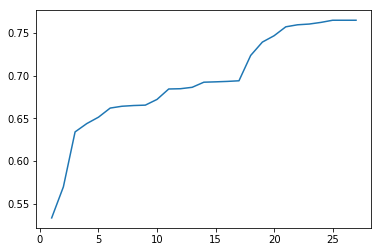

In [14]:
data_y=df_train['target']
df_train_lin=df_train.drop(columns='target')
result=[]
for i in range(1, len(df_train.columns)+1):
    data_x=df_train_lin[df_train_lin.columns[0:i+1]]
    result.append(linear_regression(data_x, data_y)[0])
plt.plot(list(range(1, len(df_train.columns)+1)), result)

видим, что $R^2$ только растёт при добавлении предикторов, думаю остановимся на данном наборе

разобьем выборку на тренировочну и тестовую, предскажем значения и посчитаем метрики

In [15]:
import xgboost
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cross_validation import train_test_split
data_train, data_test, y_train, y_test = train_test_split(df_train, data_y, test_size=0.3, random_state=42)

# обучим модель c помощью метода градиентоного бустинга
x_train = data_train.drop(columns='target')
y_train = data_train['target']
x_test = data_test.drop(columns='target')
y_test = data_test['target']

xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train:  1.0
Test:  0.99


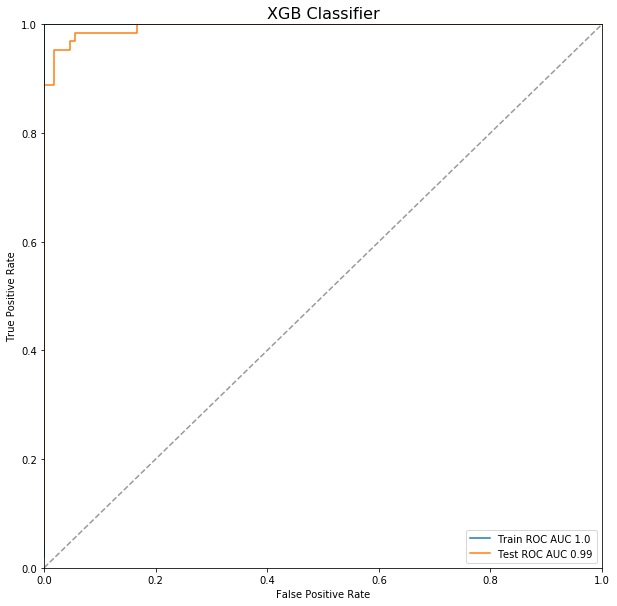

In [16]:
# на тестовых данных показатель прогностической силы классификатора хуже, но не сильно, 
# визуализируем построим график ROC AUC кривой

import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

ОТЛИЧНОЕ КАЧЕСТВО МОДЕЛИ КАК НА ТРЕНИРОВОЧНЫХ, ТАК И НА ТЕСТОВЫХ ДАННЫХ

ПОСМОТРИМ НА МАТРИЦУ ОШИБОК КЛАССИФИКАЦИИ

In [41]:
from sklearn.metrics import confusion_matrix
conf_matr=pd.DataFrame(confusion_matrix(np.array(y_train), np.round(y_train_predict)))
conf_matr.rename(columns={0:'pred_1',1:'pred_0'}, index={0:'fact_1',1:'fact_0'})

,pred_1,pred_0
fact_1,249,0
fact_0,0,149


видим, что FP и FN отсутствуют, что говорит об отличной точности предсказания класса 

ПОСЧИТАЕМ ACCURACY

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('precision(точность): {}'.format(precision_score(np.array(y_train), np.round(y_train_predict))))
print('recall(полнота): {}'.format(recall_score(np.array(y_train), np.round(y_train_predict))))
print('accuracy: {}'.format(accuracy_score(np.array(y_train), np.round(y_train_predict))))

precision(точность): 1.0
recall(полнота): 1.0
accuracy: 1.0
